# **TRABALHO DE INTRODUÇÃO À CIÊNCIA DOS DADOS**

**Tema:**  Vendas de videogames no mundo


**Integrantes:**
- Thaís Ferreira da Silva (2021092571)
- Iasmin Correa Araújo (2021031530)
- Filipe de Araujo Mendes (2021031920)


In [28]:
"""
Instalar opendatasets para baixar mais fácil o df
Ainda vai ter que criar uma conta na kaggle e criar um novo token para baixar
"""
!pip install opendatasets

Para executar a célula abaixo, serão solicitadas credenciais do Kaggle. Podem ser utilizadas as seguintes credenciais:

*username:* iasminarajo

*key:* e085dce4c3cbf95ea8c283cefce60a9a

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import opendatasets as od
import seaborn as sns

od.download(
    "https://www.kaggle.com/datasets/gregorut/videogamesales")

Skipping, found downloaded files in ".\videogamesales" (use force=True to force download)


# **About Dataset**

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.

In [30]:
# Carregando dados

df =  pd.read_csv("videogamesales/vgsales.csv")

df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [31]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [32]:
VGSALES = df.copy() # criar uma cópia apenas para o exemplo
VGSALES['Publisher'] = VGSALES['Publisher'].fillna("Not_identified")
VGSALES = VGSALES[VGSALES['Year'].notna()]
VGSALES.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [33]:
VGSALES.info() #descrição da tabela sem valores nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [34]:
VGSALES.describe() # primeiras estatísticas

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16327.000000  16327.000000  16327.000000  16327.000000  16327.000000   
mean    8292.868194   2006.406443      0.265415      0.147554      0.078661   
std     4792.669778      5.828981      0.821591      0.508766      0.311557   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4136.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8295.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12441.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16327.000000  16327.000000  
mean       0.048325      0.540232  
std        0.189885      1.565732  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  
max       10.570000     82.740000

In [35]:
# dados agrupados por plataforma
sales_by_platform = VGSALES.groupby('Platform').sum()
plat_rank = VGSALES[["Platform","Rank"]]
mean_rank = plat_rank.groupby('Platform').mean()
sales_by_platform["Rank"] = mean_rank
sales_by_platform

Rank       Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Platform                                                                       
2600       4362.844828   229928.0     80.78      4.86      0.00         0.84   
3DO       14372.666667     5984.0      0.00      0.00      0.10         0.00   
3DS        9126.464000  1006531.0     78.03     58.30     97.30        12.55   
DC         8771.423077   103997.0      5.43      1.69      8.56         0.27   
DS         9606.255509  4283493.0    388.56    194.07    175.02        60.29   
GB         3406.164948   193608.0    113.64     47.51     85.12         8.16   
GBA        8690.937115  1624604.0    184.12     74.59     46.56         7.61   
GC         8617.328413  1085843.0    131.94     38.32     21.34         5.13   
GEN        7037.740741    53812.0     19.27      5.52      2.67         0.89   
GG        13527.000000     1992.0      0.00      0.00      0.04         0.00   
N64        6521.863924   631536.0    138.91     41.03     33.76         4.31   
NES        1906.438776   194741.0    125.94     21.15     98.65         5.31   
NG        10665.666667    23934.0      0.00      0.00      1.44         0.00   
PC        11458.184517  1894273.0     92.10    137.64      0.17        24.33   
PCFX      14559.000000     1996.0      0.00      0.00      0.03         0.00   
PS         6956.608074  2375627.0    334.71    212.38    139.78        40.69   
PS2        7483.601316  4263750.0    572.92    332.63    137.54       190.47   
PS3        6766.470859  2622109.0    388.90    340.47     79.21       140.81   
PS4        7625.562500   677042.0     96.80    123.70     14.30        43.36   
PSP       10414.389307  2404440.0    107.09     67.16     75.89        41.52   
PSV       11471.769417   829782.0     16.07     16.27     20.89         8.41   
SAT        9333.936416   345313.0      0.72      0.54     32.26         0.07   
SCD       10171.833333    11963.0      1.00      0.36      0.45         0.05   
SNES       6346.460251   476529.0     61.23     19.04    116.55         3.22   
TG16      12381.500000     3990.0      0.00      0.00      0.16         0.00   
WS         7878.833333    12000.0      0.00      0.00      1.42         0.00   
Wii        7697.413178  2591562.0    497.37    264.35     68.28        79.20   
WiiU       7756.237762   287944.0     38.32     24.23     12.79         6.45   
X360       6647.361943  2482205.0    594.33    278.01     12.30        84.67   
XB         8761.047323  1608920.0    182.06     59.65      1.38         8.48   
XOne       7397.061033   429150.0     83.19     45.65      0.34        11.92   

          Global_Sales  
Platform                
2600             86.57  
3DO               0.10  
3DS             246.28  
DC               15.97  
DS              818.96  
GB              254.42  
GBA             313.56  
GC              197.14  
GEN              28.36  
GG                0.04  
N64             218.21  
NES             251.07  
NG                1.44  
PC              255.05  
PCFX              0.03  
PS              727.39  
PS2            1233.46  
PS3             949.35  
PS4             278.10  
PSP             291.71  
PSV              61.63  
SAT              33.59  
SCD               1.87  
SNES            200.05  
TG16              0.16  
WS                1.42  
Wii             909.81  
WiiU             81.86  
X360            969.61  
XB              252.09  
XOne            141.06

In [36]:
# remove platforms with less than 1% of the total sales
sales_by_platform = sales_by_platform[sales_by_platform["Global_Sales"] > 0.01]
sales_by_platform


Rank       Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Platform                                                                       
2600       4362.844828   229928.0     80.78      4.86      0.00         0.84   
3DO       14372.666667     5984.0      0.00      0.00      0.10         0.00   
3DS        9126.464000  1006531.0     78.03     58.30     97.30        12.55   
DC         8771.423077   103997.0      5.43      1.69      8.56         0.27   
DS         9606.255509  4283493.0    388.56    194.07    175.02        60.29   
GB         3406.164948   193608.0    113.64     47.51     85.12         8.16   
GBA        8690.937115  1624604.0    184.12     74.59     46.56         7.61   
GC         8617.328413  1085843.0    131.94     38.32     21.34         5.13   
GEN        7037.740741    53812.0     19.27      5.52      2.67         0.89   
GG        13527.000000     1992.0      0.00      0.00      0.04         0.00   
N64        6521.863924   631536.0    138.91     41.03     33.76         4.31   
NES        1906.438776   194741.0    125.94     21.15     98.65         5.31   
NG        10665.666667    23934.0      0.00      0.00      1.44         0.00   
PC        11458.184517  1894273.0     92.10    137.64      0.17        24.33   
PCFX      14559.000000     1996.0      0.00      0.00      0.03         0.00   
PS         6956.608074  2375627.0    334.71    212.38    139.78        40.69   
PS2        7483.601316  4263750.0    572.92    332.63    137.54       190.47   
PS3        6766.470859  2622109.0    388.90    340.47     79.21       140.81   
PS4        7625.562500   677042.0     96.80    123.70     14.30        43.36   
PSP       10414.389307  2404440.0    107.09     67.16     75.89        41.52   
PSV       11471.769417   829782.0     16.07     16.27     20.89         8.41   
SAT        9333.936416   345313.0      0.72      0.54     32.26         0.07   
SCD       10171.833333    11963.0      1.00      0.36      0.45         0.05   
SNES       6346.460251   476529.0     61.23     19.04    116.55         3.22   
TG16      12381.500000     3990.0      0.00      0.00      0.16         0.00   
WS         7878.833333    12000.0      0.00      0.00      1.42         0.00   
Wii        7697.413178  2591562.0    497.37    264.35     68.28        79.20   
WiiU       7756.237762   287944.0     38.32     24.23     12.79         6.45   
X360       6647.361943  2482205.0    594.33    278.01     12.30        84.67   
XB         8761.047323  1608920.0    182.06     59.65      1.38         8.48   
XOne       7397.061033   429150.0     83.19     45.65      0.34        11.92   

          Global_Sales  
Platform                
2600             86.57  
3DO               0.10  
3DS             246.28  
DC               15.97  
DS              818.96  
GB              254.42  
GBA             313.56  
GC              197.14  
GEN              28.36  
GG                0.04  
N64             218.21  
NES             251.07  
NG                1.44  
PC              255.05  
PCFX              0.03  
PS              727.39  
PS2            1233.46  
PS3             949.35  
PS4             278.10  
PSP             291.71  
PSV              61.63  
SAT              33.59  
SCD               1.87  
SNES            200.05  
TG16              0.16  
WS                1.42  
Wii             909.81  
WiiU             81.86  
X360            969.61  
XB              252.09  
XOne            141.06

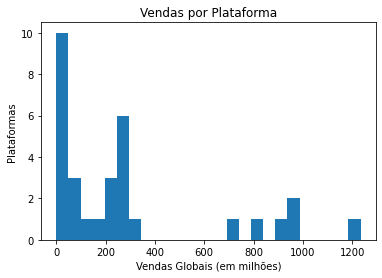

In [37]:
# histograma de vendas por plataforma

import matplotlib.pyplot as plt

plt.hist(sales_by_platform['Global_Sales'], bins=25)
plt.xlabel('Vendas Globais (em milhões)')
plt.ylabel('Plataformas')
plt.title('Vendas por Plataforma')
plt.show()


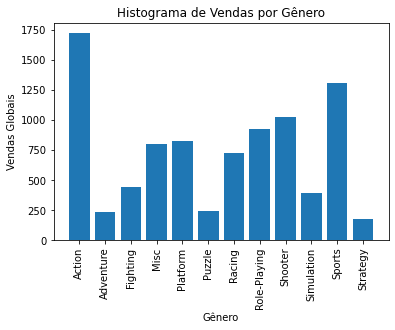

In [38]:
# histograma vendas por gênero

sales_by_genre = VGSALES.groupby('Genre')['Global_Sales'].sum()

plt.bar(sales_by_genre.index, sales_by_genre)
plt.xlabel('Gênero')
plt.ylabel('Vendas Globais')
plt.title('Histograma de Vendas por Gênero')
plt.xticks(rotation=90)
plt.show()


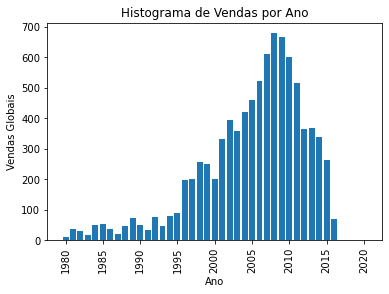

In [39]:
# vendas por ano
sales_by_year = VGSALES.groupby('Year')['Global_Sales'].sum()
plt.bar(sales_by_year.index, sales_by_year)
plt.xlabel('Ano')
plt.ylabel('Vendas Globais')
plt.title('Histograma de Vendas por Ano')
plt.xticks(rotation=90)
plt.show()

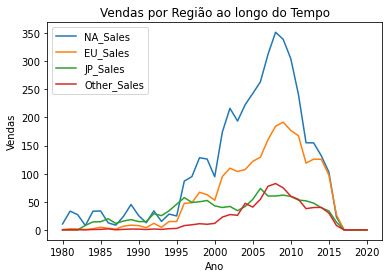

In [40]:
sales_by_region = VGSALES.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

sales_by_region.plot()
plt.xlabel('Ano')
plt.ylabel('Vendas')
plt.title('Vendas por Região ao longo do Tempo')
plt.legend(loc='upper left')
plt.show()



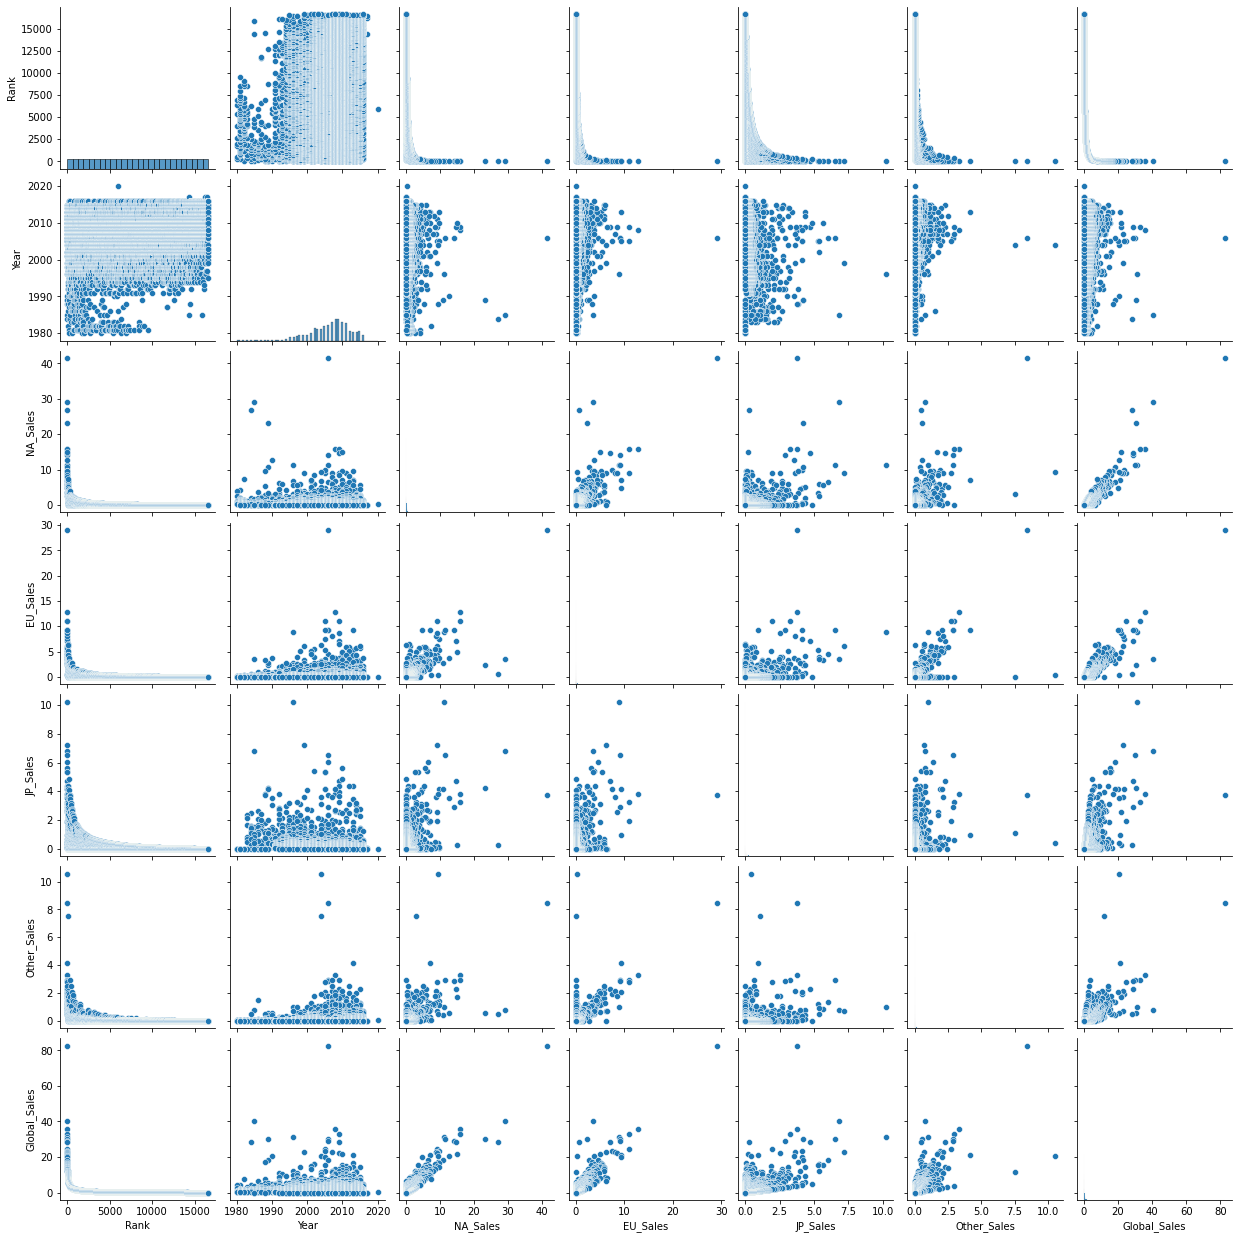

In [41]:
pair = sns.pairplot(VGSALES)

d:\Anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


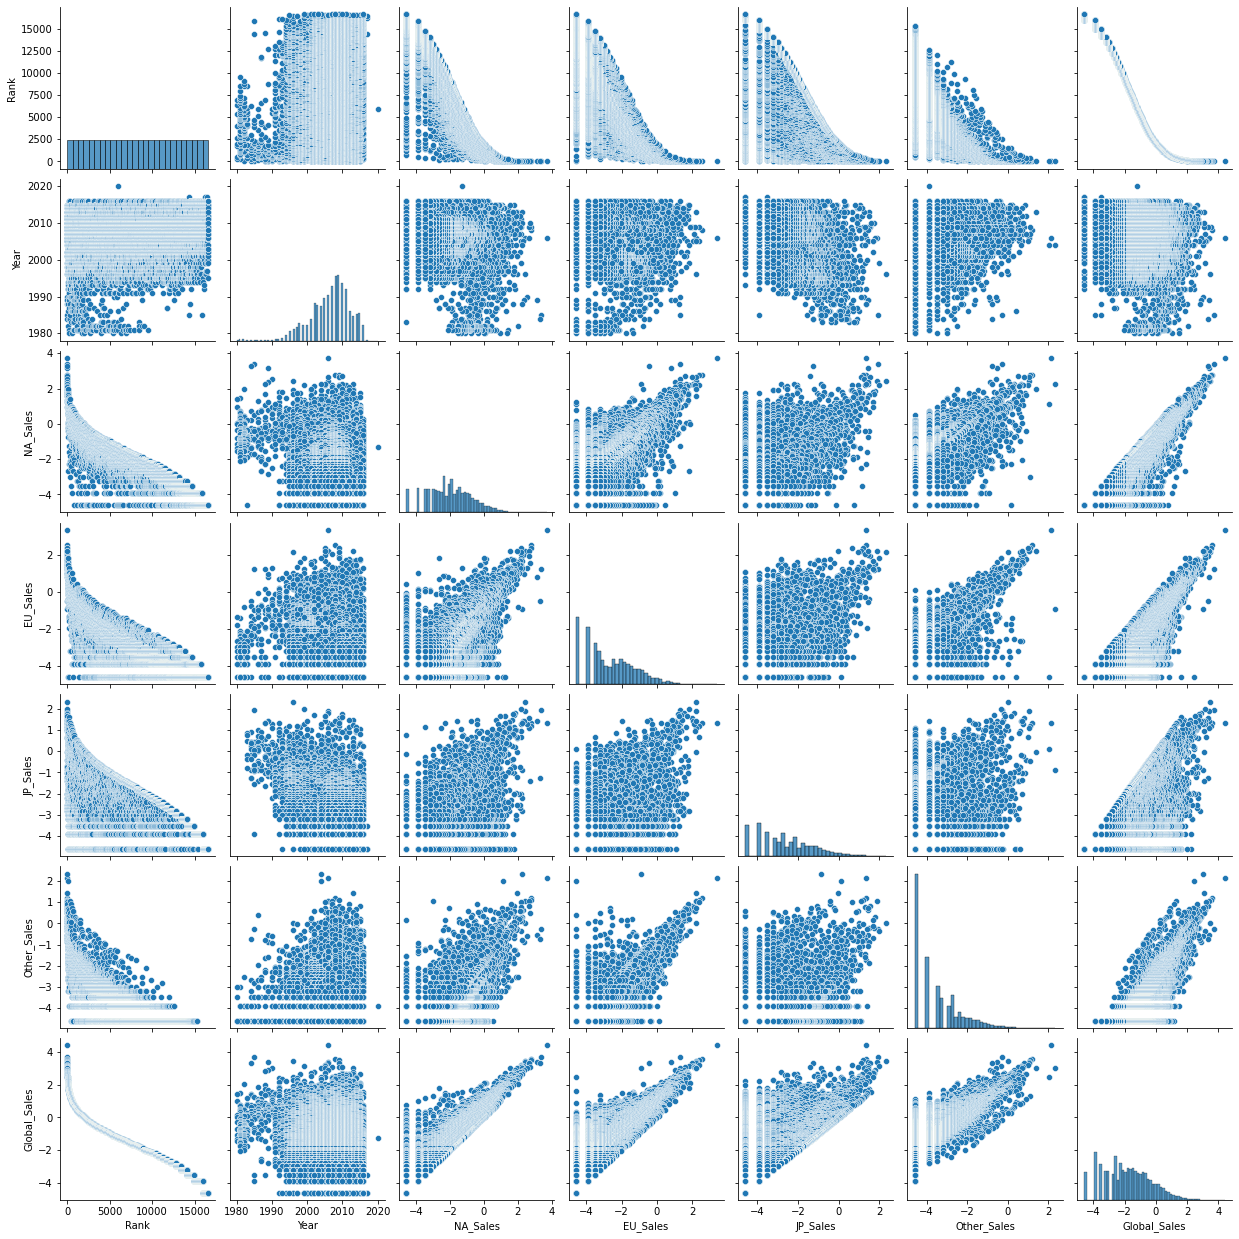

In [42]:
# create a dataset with log scale
VGSALES_log = VGSALES.copy()
VGSALES_log['Global_Sales'] = np.log(VGSALES_log['Global_Sales'])
VGSALES_log['NA_Sales'] = np.log(VGSALES_log['NA_Sales'])
VGSALES_log['EU_Sales'] = np.log(VGSALES_log['EU_Sales'])
VGSALES_log['JP_Sales'] = np.log(VGSALES_log['JP_Sales'])
VGSALES_log['Other_Sales'] = np.log(VGSALES_log['Other_Sales'])
# create pairplot with log scale
pair_log = sns.pairplot(VGSALES_log)

<AxesSubplot:>

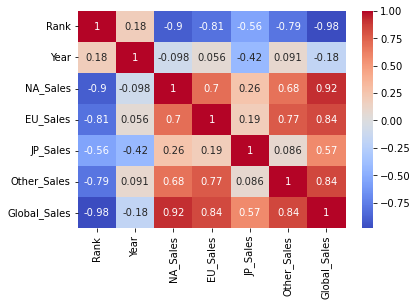

In [43]:
# plot correlation matrix
corr = VGSALES_log.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [44]:
# get percentage sales by platform
platform_sales = VGSALES[['Platform', 'Global_Sales']].groupby('Platform').sum().reset_index()
platform_sales['Percentage'] = platform_sales['Global_Sales'] / platform_sales['Global_Sales'].sum() * 100
platform_sales = platform_sales.sort_values(by='Percentage', ascending=False)
platform_sales


Platform  Global_Sales  Percentage
16      PS2       1233.46   13.984236
28     X360        969.61   10.992862
17      PS3        949.35   10.763166
26      Wii        909.81   10.314885
4        DS        818.96    9.284882
15       PS        727.39    8.246716
6       GBA        313.56    3.554957
19      PSP        291.71    3.307235
18      PS4        278.10    3.152933
13       PC        255.05    2.891605
5        GB        254.42    2.884463
29       XB        252.09    2.858047
11      NES        251.07    2.846482
2       3DS        246.28    2.792176
10      N64        218.21    2.473935
23     SNES        200.05    2.268048
7        GC        197.14    2.235056
30     XOne        141.06    1.599254
0      2600         86.57    0.981479
27     WiiU         81.86    0.928080
20      PSV         61.63    0.698724
21      SAT         33.59    0.380823
8       GEN         28.36    0.321529
3        DC         15.97    0.181058
22      SCD          1.87    0.021201
12       NG          1.44    0.016326
25       WS          1.42    0.016099
24     TG16          0.16    0.001814
1       3DO          0.10    0.001134
9        GG          0.04    0.000453
14     PCFX          0.03    0.000340

In [45]:
# check how much of total is the sum of sales of platforms with less than 1% of sales
platform_sales[platform_sales['Percentage'] < 1]['Percentage'].sum()


3.5490614895537154

In [46]:
# remove platforms with less than 1% of sales
platform_sales = platform_sales[platform_sales['Percentage'] > 1]
platform_sales


Platform  Global_Sales  Percentage
16      PS2       1233.46   13.984236
28     X360        969.61   10.992862
17      PS3        949.35   10.763166
26      Wii        909.81   10.314885
4        DS        818.96    9.284882
15       PS        727.39    8.246716
6       GBA        313.56    3.554957
19      PSP        291.71    3.307235
18      PS4        278.10    3.152933
13       PC        255.05    2.891605
5        GB        254.42    2.884463
29       XB        252.09    2.858047
11      NES        251.07    2.846482
2       3DS        246.28    2.792176
10      N64        218.21    2.473935
23     SNES        200.05    2.268048
7        GC        197.14    2.235056
30     XOne        141.06    1.599254

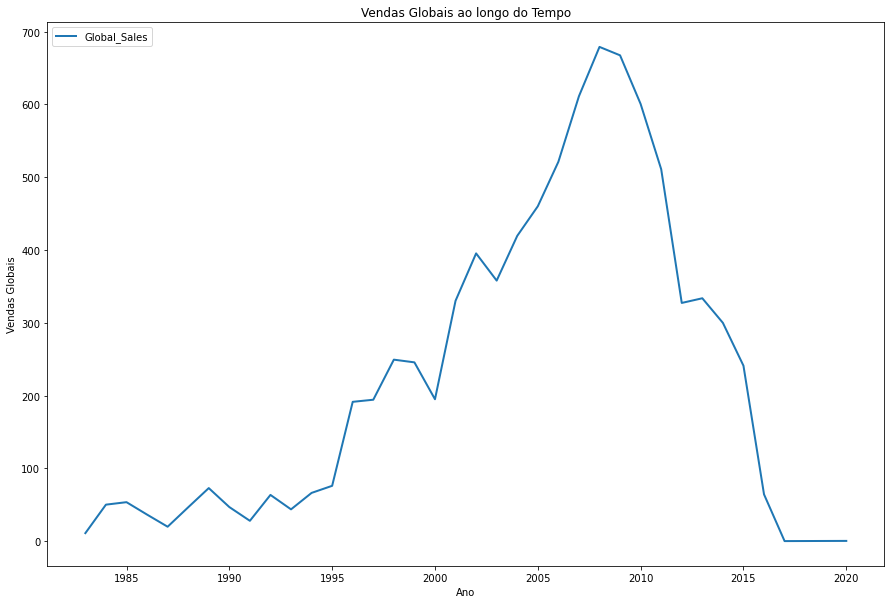

Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0   1983.0      2.32      0.46      8.10         0.08         10.96
1   1984.0     33.02      2.09     14.27         0.70         50.09
2   1985.0     33.31      4.71     14.56         0.92         53.49
3   1986.0     11.87      2.80     19.81         1.93         36.41
4   1987.0      6.62      1.32     11.63         0.19         19.76
5   1988.0     23.18      6.55     15.76         0.98         46.47
6   1989.0     44.56      8.41     18.36         1.49         72.83
7   1990.0     23.60      7.08     14.77         1.32         46.79
8   1991.0      9.73      3.04     14.52         0.61         27.89
9   1992.0     24.70      9.33     28.15         1.28         63.46
10  1993.0     14.12      4.29     24.38         0.84         43.62
11  1994.0     22.77     13.08     28.54         1.87         66.23
12  1995.0     24.27     14.48     34.63         2.59         75.96
13  1996.0     86.76     47.26     49.62         7.69        191.33
14  1997.0     94.75     48.32     42.10         9.13        194.21
15  1998.0    127.10     66.29     44.79        10.95        249.26
16  1999.0    124.42     62.38     48.62         9.99        245.55
17  2000.0     91.96     51.96     39.55        11.49        194.89
18  2001.0    173.98     94.89     38.51        22.76        330.12
19  2002.0    216.19    109.74     41.47        27.28        395.23
20  2003.0    193.59    103.81     34.20        26.01        357.85
21  2004.0    222.59    107.32     41.65        47.29        419.31
22  2005.0    242.61    121.94     54.28        40.58        459.94
23  2006.0    263.12    129.24     73.73        54.43        521.04
24  2007.0    312.05    160.50     60.27        77.60        611.11
25  2008.0    351.44    184.40     60.22        82.39        678.86
26  2009.0    338.85    191.59     61.89        74.77        667.30
27  2010.0    304.24    176.73     59.49        59.90        600.45
28  2011.0    239.34    165.55     52.24        53.60        510.84
29  2012.0    138.91    107.36     47.16        33.49        327.17
30  2013.0    141.13    116.05     40.00        36.36        333.58
31  2014.0    117.98    115.68     30.25        35.90        299.80
32  2015.0     95.51     91.53     25.54        28.24        240.96
33  2016.0     20.98     25.47     10.40         7.36         64.24
34  2017.0      0.00      0.00      0.03         0.00          0.03
35  2020.0      0.27      0.00      0.00         0.02          0.29

In [52]:
# get total sales per year
sales_year = VGSALES[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby('Year').sum().reset_index()
sales_year.plot(x='Year', y='Global_Sales', figsize=(15, 10), linewidth=2)
plt.xlabel('Ano')
plt.ylabel('Vendas Globais')
plt.title('Vendas Globais ao longo do Tempo')
plt.legend(loc='upper left')
plt.show()
sales_year



In [ ]:
VGSALES[VGSALES['Year'] == 2000]

Rank                                Name Platform    Year  \
132      133             Pokémon Crystal Version       GB  2000.0   
173      174                    Final Fantasy IX       PS  2000.0   
223      224                            Driver 2       PS  2000.0   
225      226            Tony Hawk's Pro Skater 2       PS  2000.0   
242      243  Dragon Quest VII: Warriors of Eden       PS  2000.0   
...      ...                                 ...      ...     ...   
15505  15508                       Point Blank 3       PS  2000.0   
15651  15654                      Airline Tycoon       PC  2000.0   
16163  16166                             Deus Ex       PC  2000.0   
16518  16521                    Crossroad Crisis       PS  2000.0   
16579  16582                   PGA European Tour      N64  2000.0   

              Genre           Publisher  NA_Sales  EU_Sales  JP_Sales  \
132    Role-Playing            Nintendo      2.55      1.56      1.29   
173    Role-Playing          SquareSoft      1.62      0.77      2.78   
223          Action               Atari      2.36      2.10      0.02   
225          Sports          Activision      3.05      1.41      0.02   
242    Role-Playing    Enix Corporation      0.20      0.14      4.10   
...             ...                 ...       ...       ...       ...   
15505       Shooter  Namco Bandai Games      0.01      0.01      0.00   
15651    Simulation           Interplay      0.00      0.01      0.00   
16163  Role-Playing   Eidos Interactive      0.00      0.01      0.00   
16518        Puzzle             Success      0.01      0.00      0.00   
16579        Sports          Infogrames      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
132           0.99          6.39  
173           0.14          5.30  
223           0.25          4.73  
225           0.20          4.68  
242           0.02          4.47  
...            ...           ...  
15505         0.00          0.02  
15651         0.00          0.02  
16163         0.00          0.01  
16518         0.00          0.01  
16579         0.00          0.01  

[349 rows x 11 columns]

d:\Anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


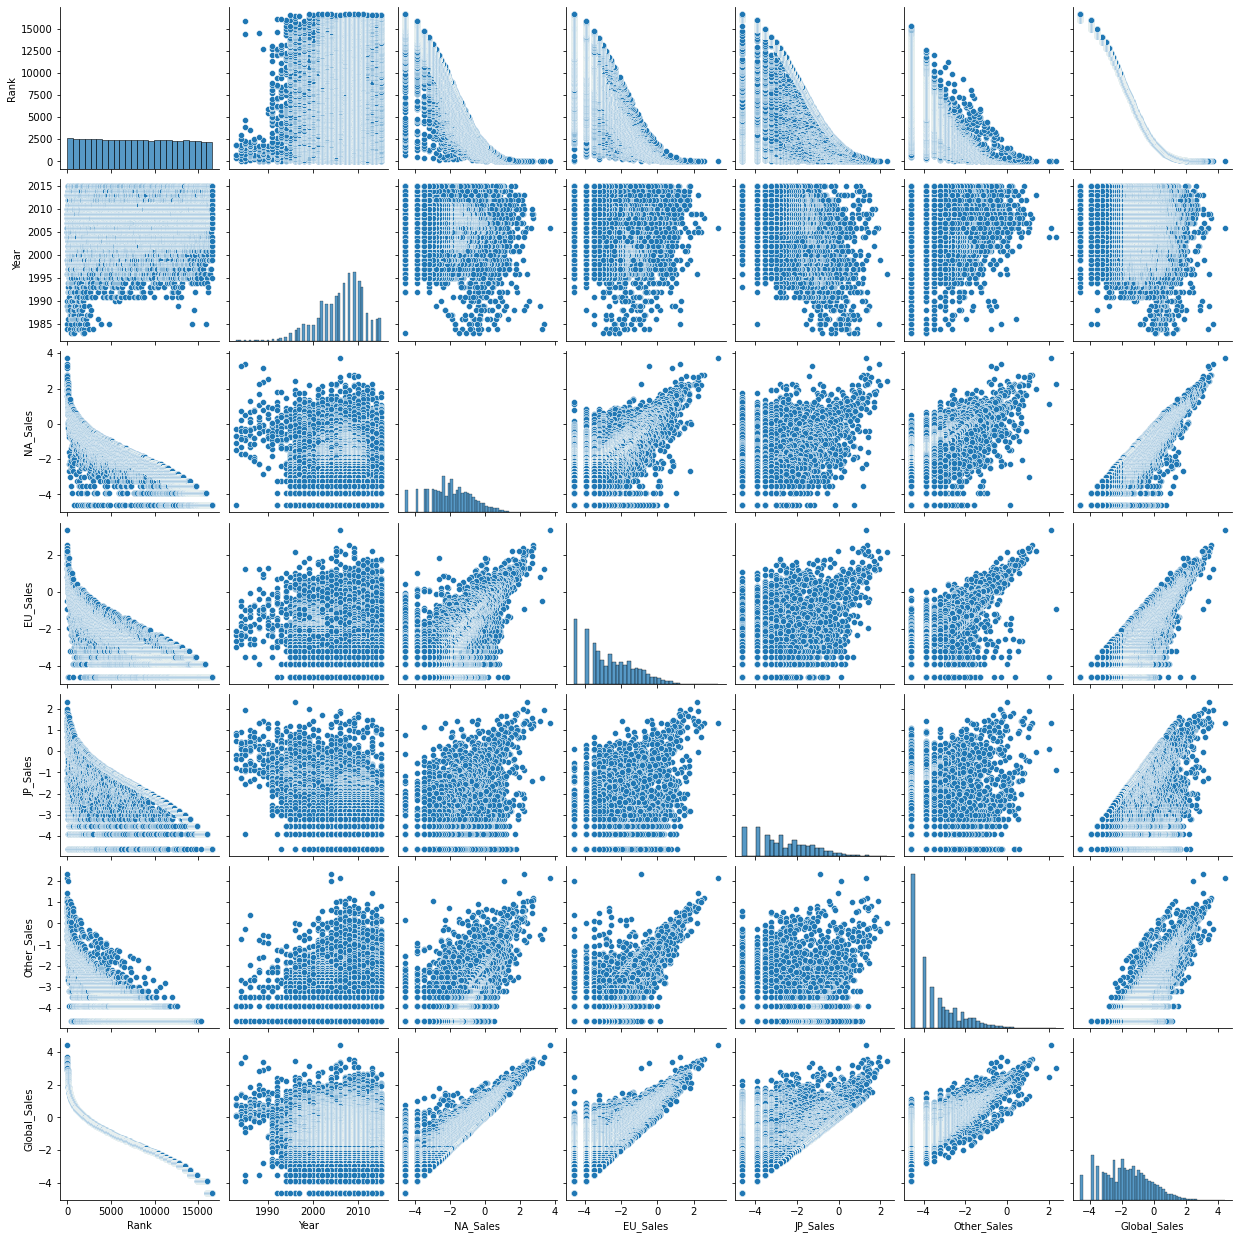

In [ ]:
#  create new dataset without data after 2010
VGSALES_2015 = VGSALES[VGSALES['Year'] <= 2015]
VGSALES_2015
# make log pairplot for VGSALES_2015
VGSALES_2015_log = VGSALES_2015.copy()
VGSALES_2015_log['Global_Sales'] = np.log(VGSALES_2015_log['Global_Sales'])
VGSALES_2015_log['NA_Sales'] = np.log(VGSALES_2015_log['NA_Sales'])
VGSALES_2015_log['EU_Sales'] = np.log(VGSALES_2015_log['EU_Sales'])
VGSALES_2015_log['JP_Sales'] = np.log(VGSALES_2015_log['JP_Sales'])
VGSALES_2015_log['Other_Sales'] = np.log(VGSALES_2015_log['Other_Sales'])
pair_log = sns.pairplot(VGSALES_2015_log)


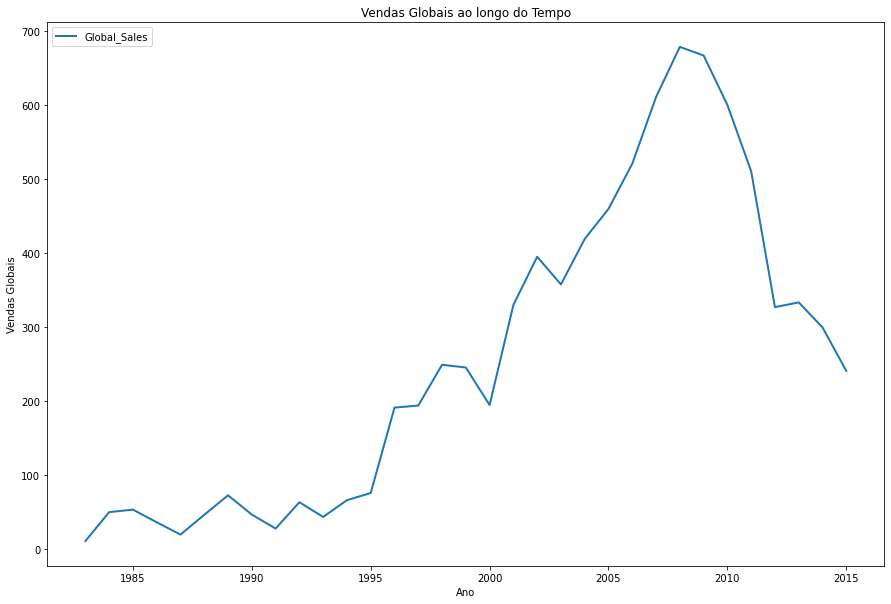

In [ ]:
# plot total sales per year
sales_year = VGSALES_2015[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby('Year').sum().reset_index()
sales_year.plot(x='Year', y='Global_Sales', figsize=(15, 10), linewidth=2)
plt.xlabel('Ano')
plt.ylabel('Vendas Globais')
plt.title('Vendas Globais ao longo do Tempo')
plt.legend(loc='upper left')
plt.show()

d:\Anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


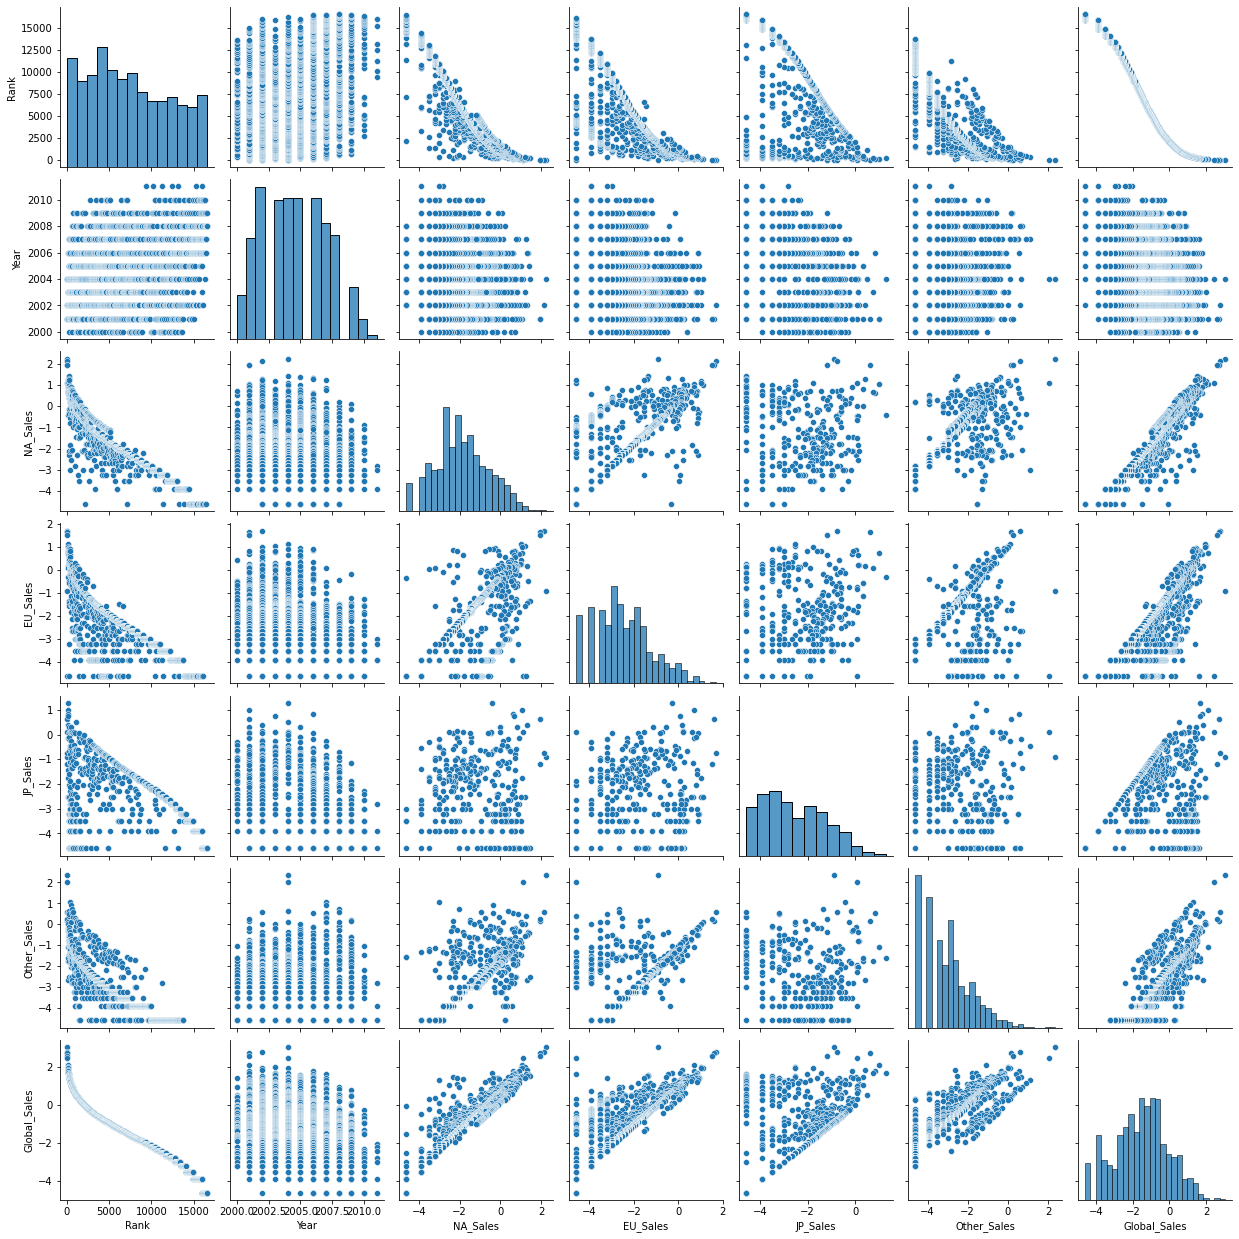

In [ ]:
PS2_sales = VGSALES_2015[VGSALES_2015['Platform'] == 'PS2']
PS2_sales
# make log pairplot for PS2
PS2_sales_log = PS2_sales.copy()
PS2_sales_log['Global_Sales'] = np.log(PS2_sales_log['Global_Sales'])
PS2_sales_log['NA_Sales'] = np.log(PS2_sales_log['NA_Sales'])
PS2_sales_log['EU_Sales'] = np.log(PS2_sales_log['EU_Sales'])
PS2_sales_log['JP_Sales'] = np.log(PS2_sales_log['JP_Sales'])
PS2_sales_log['Other_Sales'] = np.log(PS2_sales_log['Other_Sales'])
pair_log = sns.pairplot(PS2_sales_log)

d:\Anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


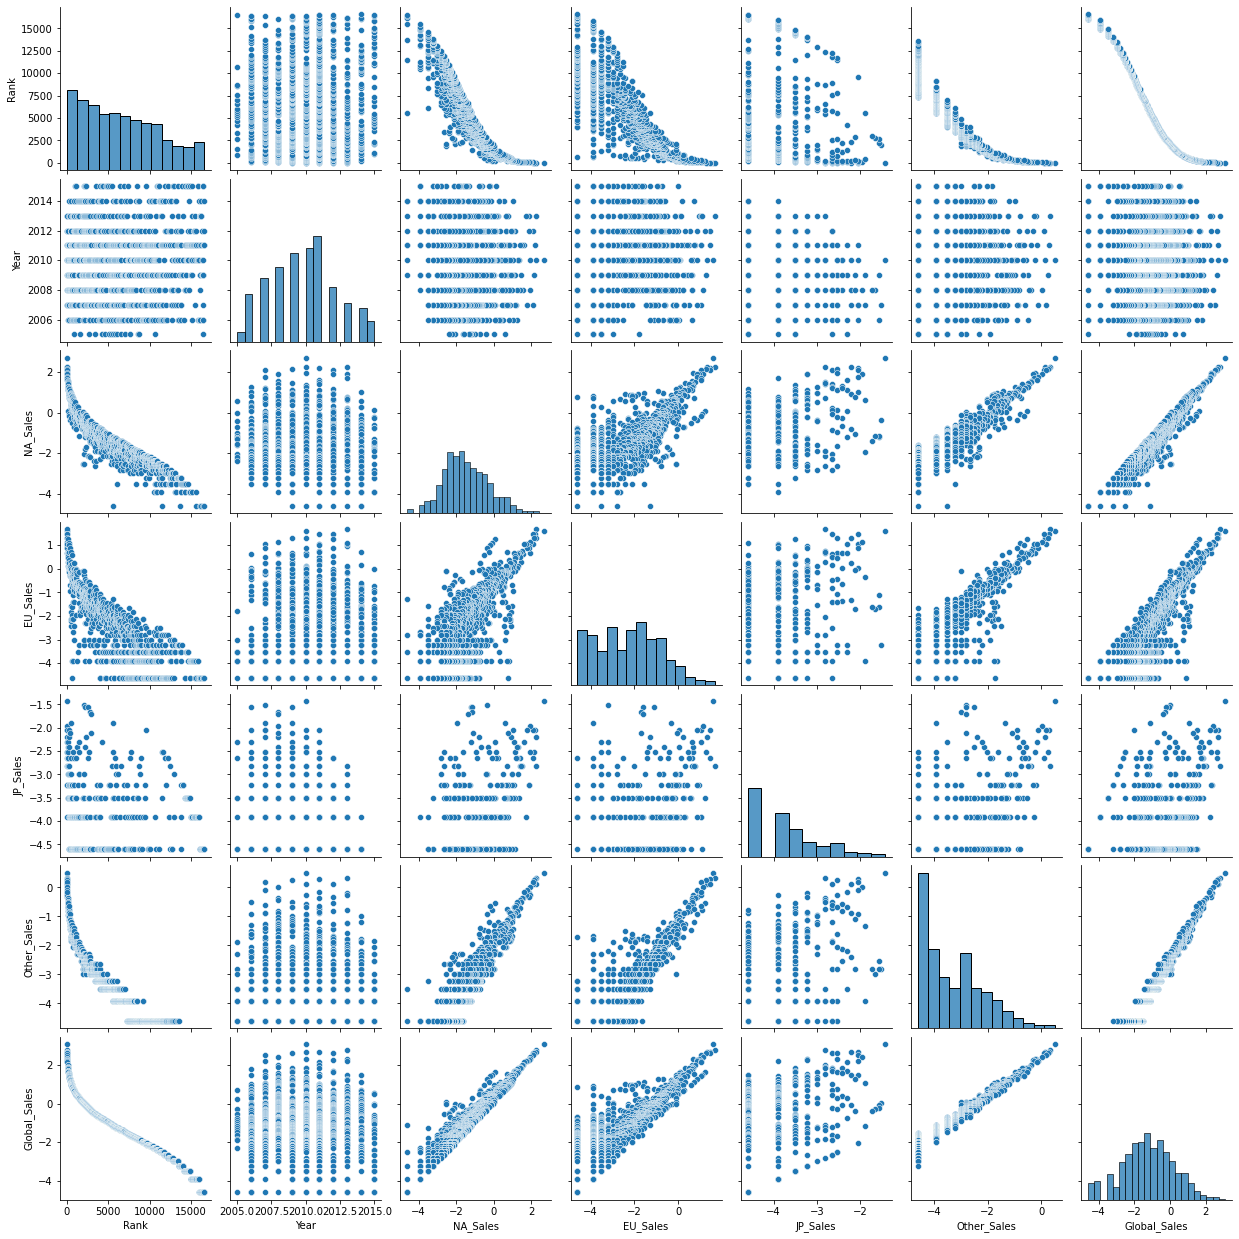

In [ ]:
X360_sales = VGSALES_2015[VGSALES_2015['Platform'] == 'X360']
X360_sales
# make log pairplot for X360
X360_sales_log = X360_sales.copy()
X360_sales_log['Global_Sales'] = np.log(X360_sales_log['Global_Sales'])
X360_sales_log['NA_Sales'] = np.log(X360_sales_log['NA_Sales'])
X360_sales_log['EU_Sales'] = np.log(X360_sales_log['EU_Sales'])
X360_sales_log['JP_Sales'] = np.log(X360_sales_log['JP_Sales'])
X360_sales_log['Other_Sales'] = np.log(X360_sales_log['Other_Sales'])
pair_log = sns.pairplot(X360_sales_log)

d:\Anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


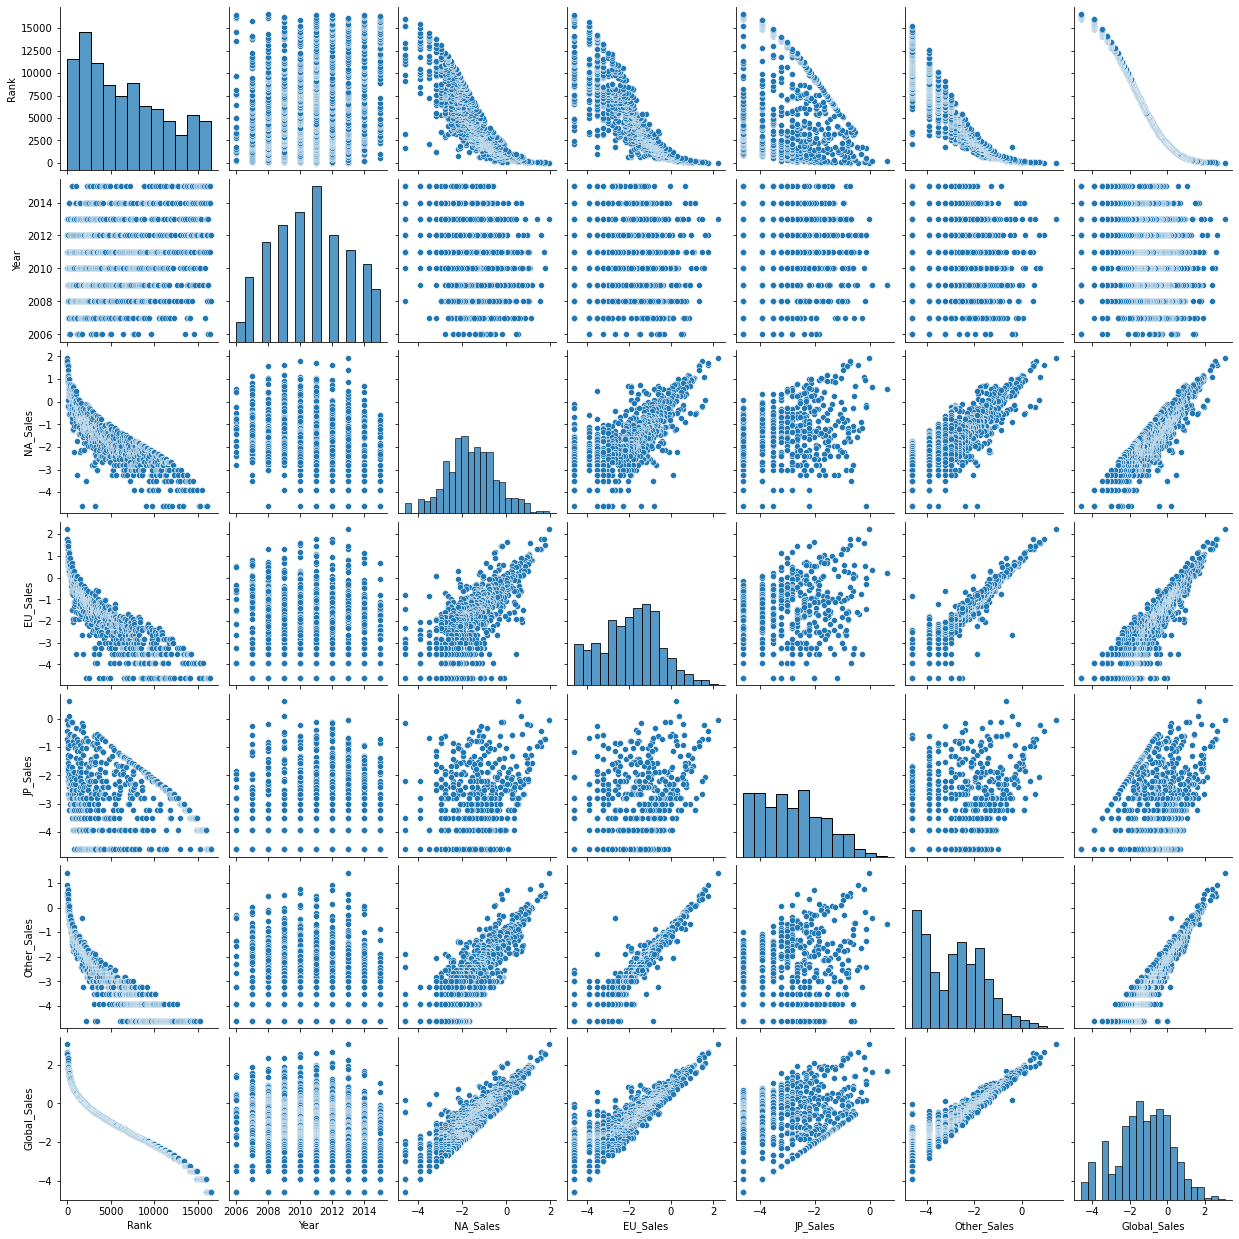

In [ ]:
PS3_sales = VGSALES_2015[VGSALES_2015['Platform'] == 'PS3']
PS3_sales
# make log pairplot for PS3
PS3_sales_log = PS3_sales.copy()
PS3_sales_log['Global_Sales'] = np.log(PS3_sales_log['Global_Sales'])
PS3_sales_log['NA_Sales'] = np.log(PS3_sales_log['NA_Sales'])
PS3_sales_log['EU_Sales'] = np.log(PS3_sales_log['EU_Sales'])
PS3_sales_log['JP_Sales'] = np.log(PS3_sales_log['JP_Sales'])
PS3_sales_log['Other_Sales'] = np.log(PS3_sales_log['Other_Sales'])
pair_log = sns.pairplot(PS3_sales_log)

d:\Anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


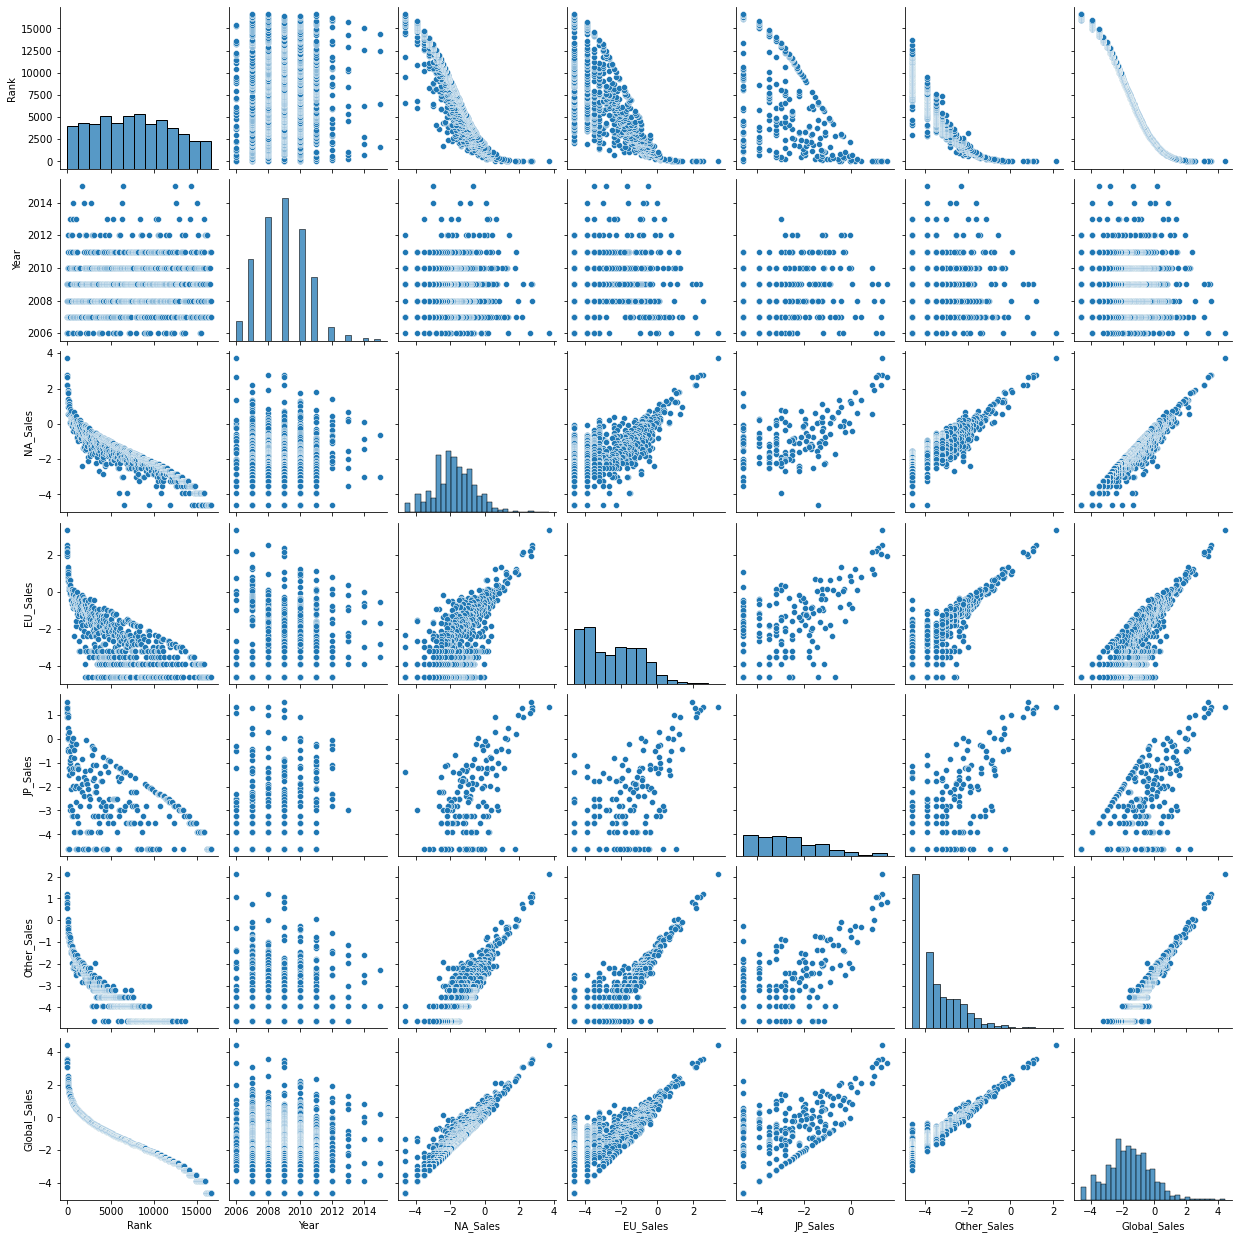

In [ ]:
Wii_sales = VGSALES_2015[VGSALES_2015['Platform'] == 'Wii']
Wii_sales
# make log pairplot for Wii
Wii_sales_log = Wii_sales.copy()
Wii_sales_log['Global_Sales'] = np.log(Wii_sales_log['Global_Sales'])
Wii_sales_log['NA_Sales'] = np.log(Wii_sales_log['NA_Sales'])
Wii_sales_log['EU_Sales'] = np.log(Wii_sales_log['EU_Sales'])
Wii_sales_log['JP_Sales'] = np.log(Wii_sales_log['JP_Sales'])
Wii_sales_log['Other_Sales'] = np.log(Wii_sales_log['Other_Sales'])
pair_log = sns.pairplot(Wii_sales_log)

d:\Anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


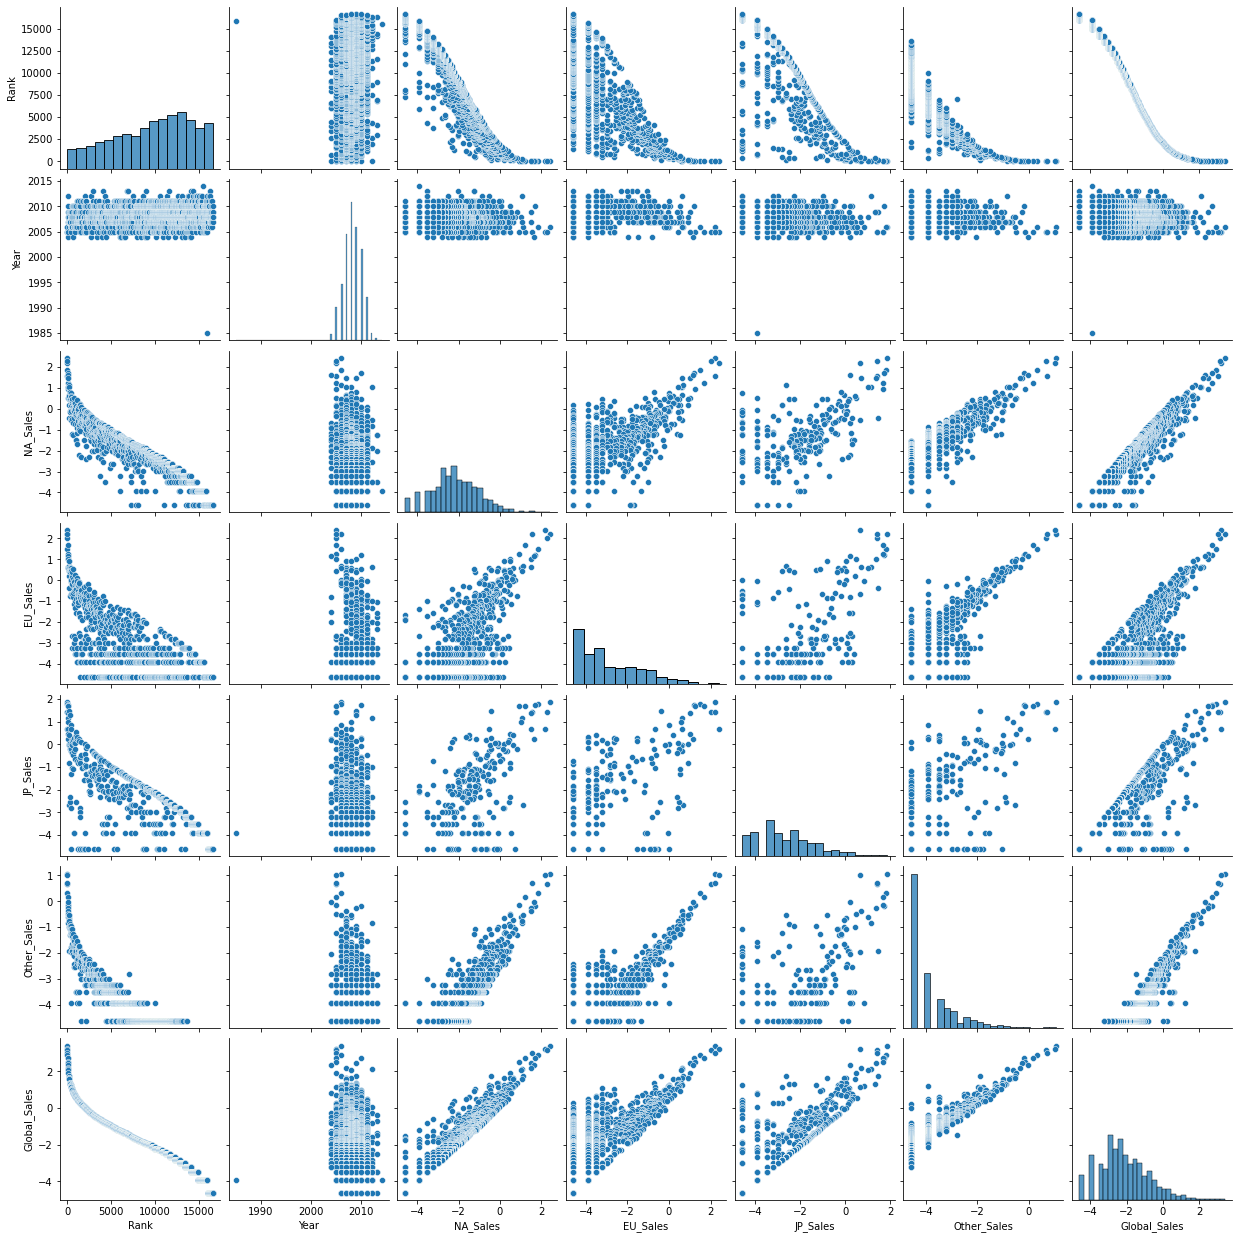

In [ ]:
DS_sales = VGSALES_2015[VGSALES_2015['Platform'] == 'DS']
DS_sales
# make log pairplot for DS
DS_sales_log = DS_sales.copy()
DS_sales_log['Global_Sales'] = np.log(DS_sales_log['Global_Sales'])
DS_sales_log['NA_Sales'] = np.log(DS_sales_log['NA_Sales'])
DS_sales_log['EU_Sales'] = np.log(DS_sales_log['EU_Sales'])
DS_sales_log['JP_Sales'] = np.log(DS_sales_log['JP_Sales'])
DS_sales_log['Other_Sales'] = np.log(DS_sales_log['Other_Sales'])
pair_log = sns.pairplot(DS_sales_log)

d:\Anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


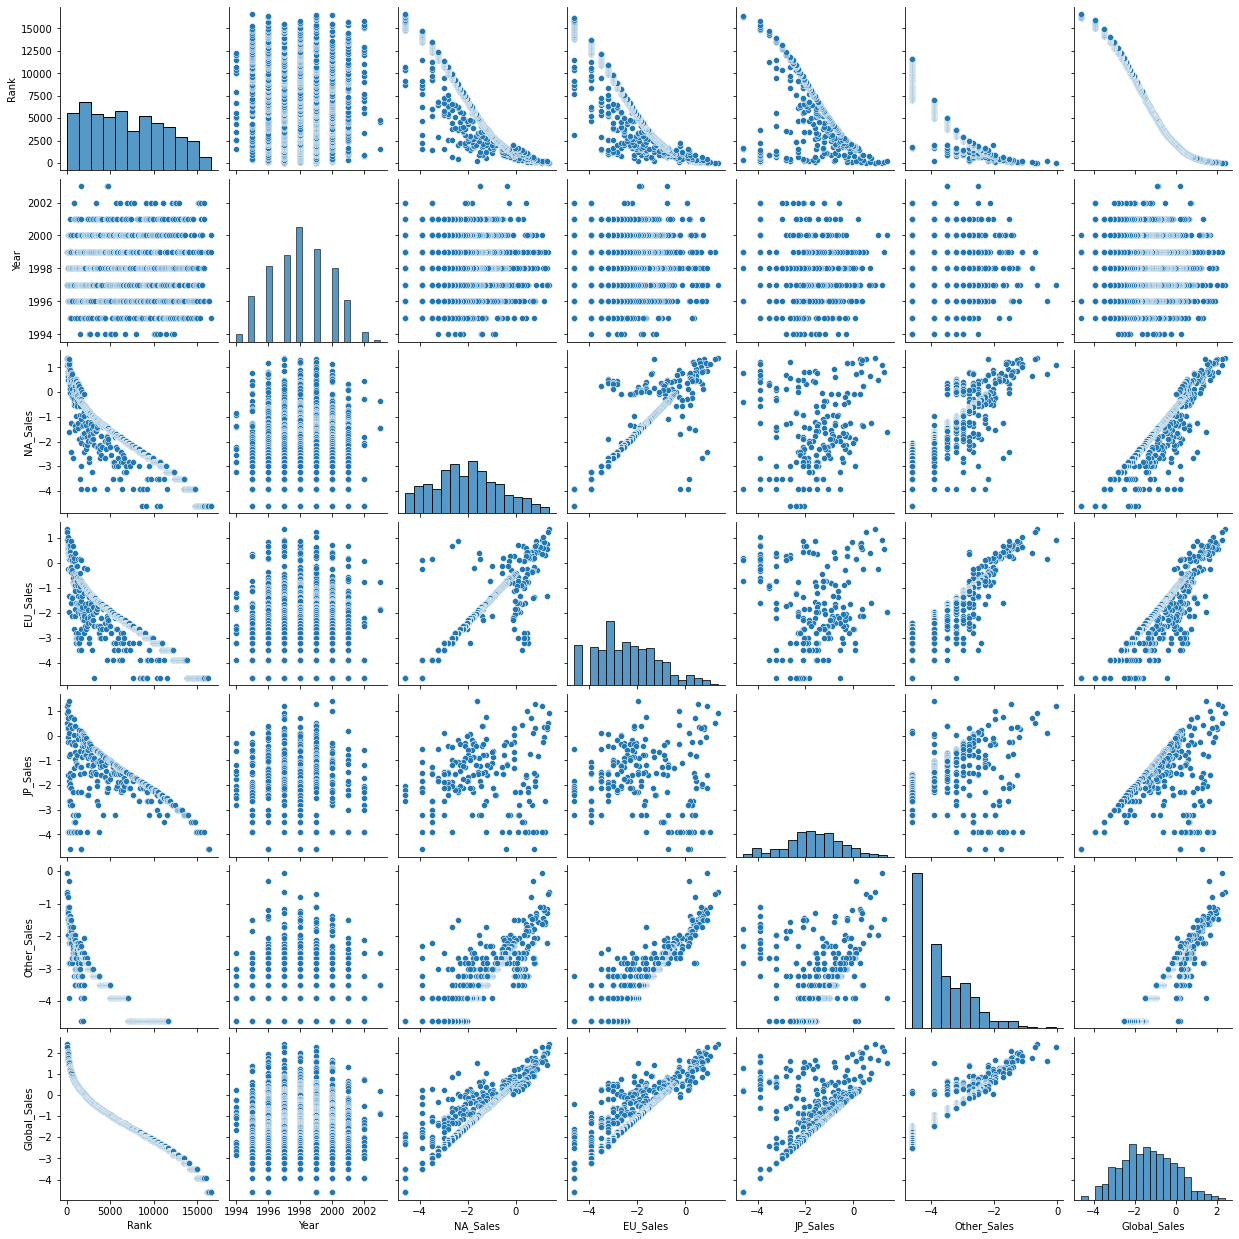

In [ ]:
PS_sales = VGSALES_2015[VGSALES_2015['Platform'] == 'PS']
PS_sales
# make log pairplot for PS
PS_sales_log = PS_sales.copy()
PS_sales_log['Global_Sales'] = np.log(PS_sales_log['Global_Sales'])
PS_sales_log['NA_Sales'] = np.log(PS_sales_log['NA_Sales'])
PS_sales_log['EU_Sales'] = np.log(PS_sales_log['EU_Sales'])
PS_sales_log['JP_Sales'] = np.log(PS_sales_log['JP_Sales'])
PS_sales_log['Other_Sales'] = np.log(PS_sales_log['Other_Sales'])
pair_log = sns.pairplot(PS_sales_log)

d:\Anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


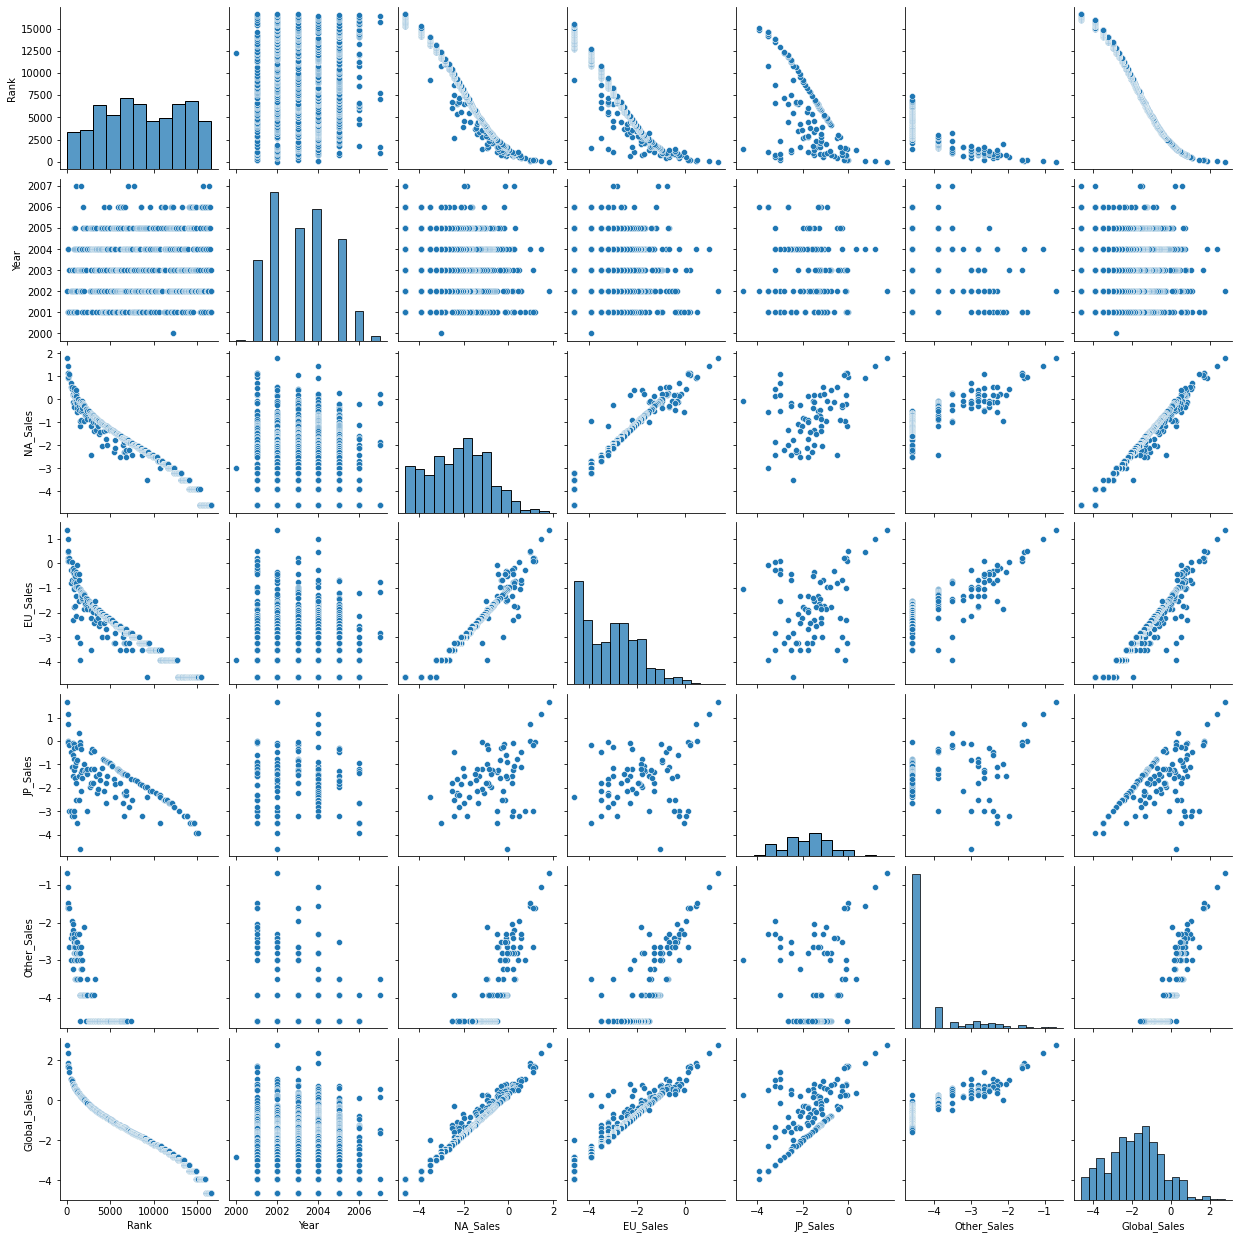

In [ ]:
GBA_sales = VGSALES_2015[VGSALES_2015['Platform'] == 'GBA']
GBA_sales
# make log pairplot for GBA
GBA_sales_log = GBA_sales.copy()
GBA_sales_log['Global_Sales'] = np.log(GBA_sales_log['Global_Sales'])
GBA_sales_log['NA_Sales'] = np.log(GBA_sales_log['NA_Sales'])
GBA_sales_log['EU_Sales'] = np.log(GBA_sales_log['EU_Sales'])
GBA_sales_log['JP_Sales'] = np.log(GBA_sales_log['JP_Sales'])
GBA_sales_log['Other_Sales'] = np.log(GBA_sales_log['Other_Sales'])
pair_log = sns.pairplot(GBA_sales_log)

d:\Anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


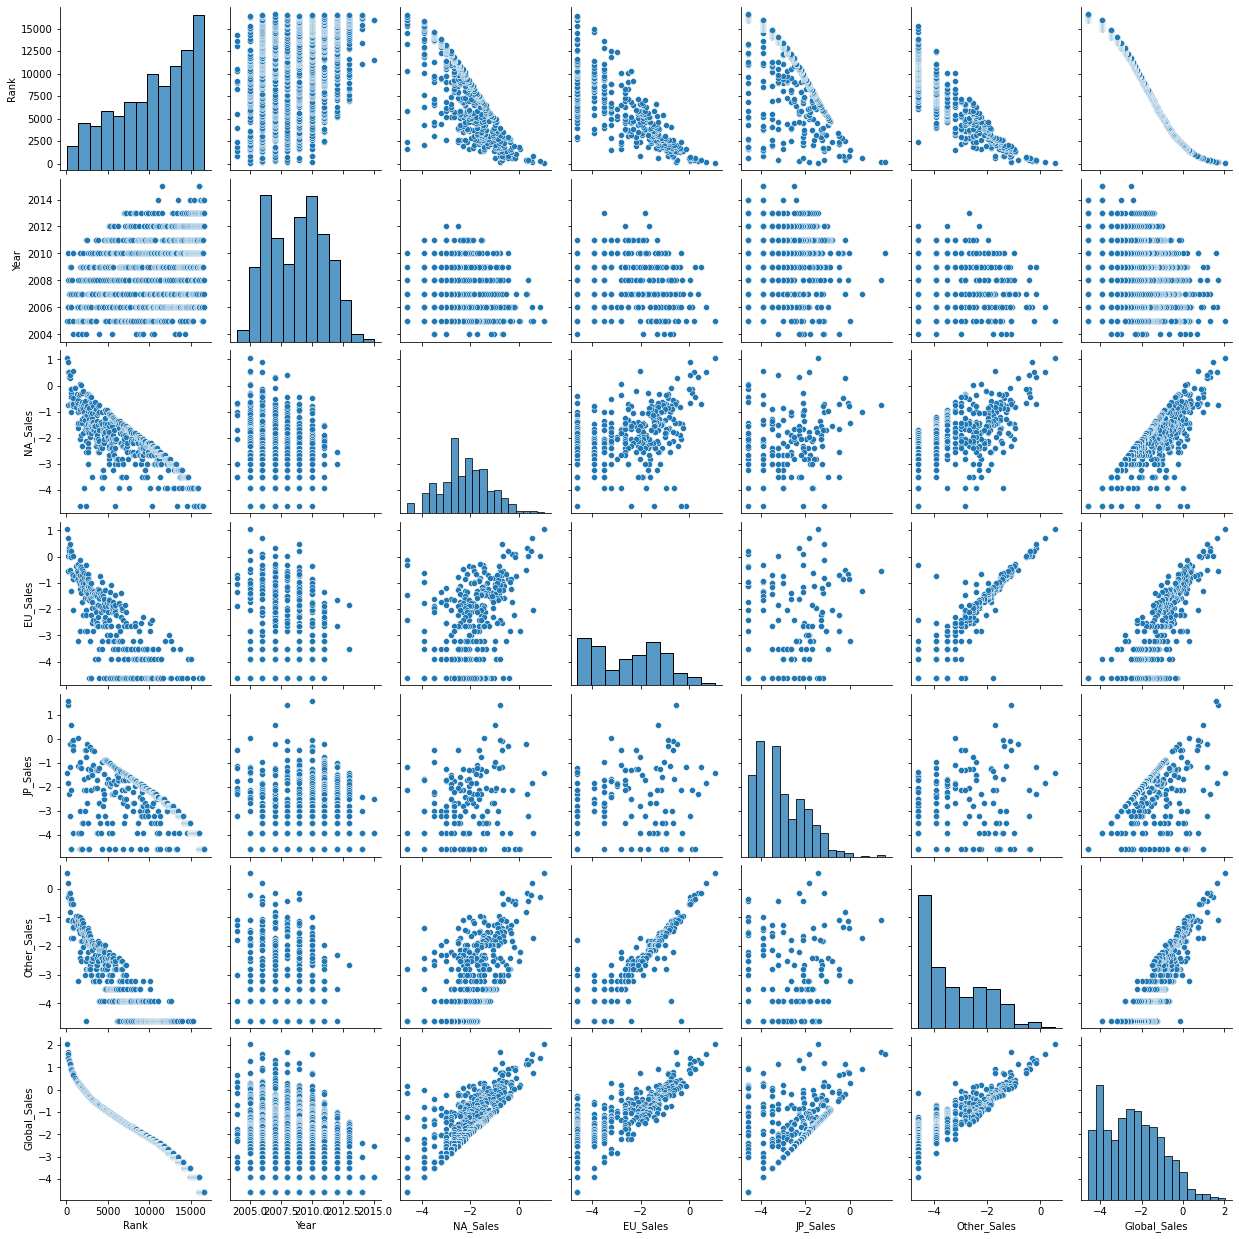

In [ ]:
PSP_sales = VGSALES_2015[VGSALES_2015['Platform'] == 'PSP']
PSP_sales
# make log pairplot for PSP
PSP_sales_log = PSP_sales.copy()
PSP_sales_log['Global_Sales'] = np.log(PSP_sales_log['Global_Sales'])
PSP_sales_log['NA_Sales'] = np.log(PSP_sales_log['NA_Sales'])
PSP_sales_log['EU_Sales'] = np.log(PSP_sales_log['EU_Sales'])
PSP_sales_log['JP_Sales'] = np.log(PSP_sales_log['JP_Sales'])
PSP_sales_log['Other_Sales'] = np.log(PSP_sales_log['Other_Sales'])
pair_log = sns.pairplot(PSP_sales_log)

d:\Anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


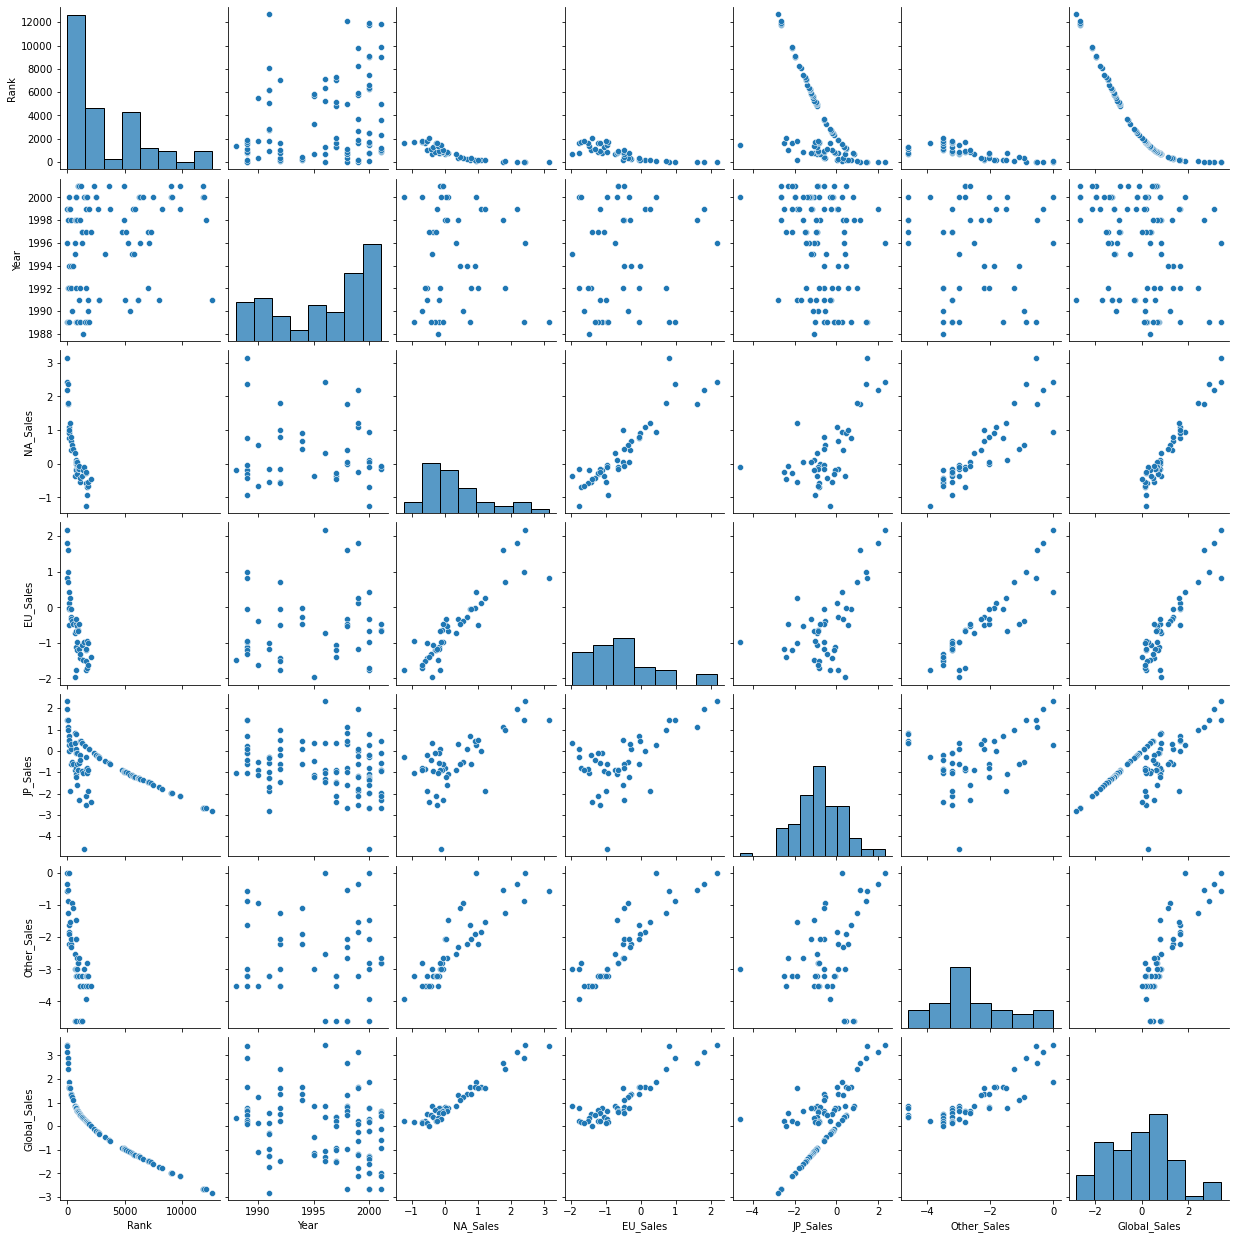

In [ ]:
GB_sales = VGSALES_2015[VGSALES_2015['Platform'] == 'GB']
GB_sales
# make log pairplot for GB
GB_sales_log = GB_sales.copy()
GB_sales_log['Global_Sales'] = np.log(GB_sales_log['Global_Sales'])
GB_sales_log['NA_Sales'] = np.log(GB_sales_log['NA_Sales'])
GB_sales_log['EU_Sales'] = np.log(GB_sales_log['EU_Sales'])
GB_sales_log['JP_Sales'] = np.log(GB_sales_log['JP_Sales'])
GB_sales_log['Other_Sales'] = np.log(GB_sales_log['Other_Sales'])
pair_log = sns.pairplot(GB_sales_log)

In [ ]:
# get percentage sales by platform
platform_sales = VGSALES_2015[['Platform', 'Global_Sales']].groupby('Platform').sum().reset_index()
platform_sales['Percentage'] = platform_sales['Global_Sales'] / platform_sales['Global_Sales'].sum() * 100
platform_sales = platform_sales.sort_values(by='Percentage', ascending=False)
platform_sales


Platform  Global_Sales  Percentage
9       PS2       1233.46   14.609677
15     X360        968.78   11.474684
10      PS3        946.76   11.213868
14      Wii        909.81   10.776215
1        DS        818.67    9.696711
8        PS        727.39    8.615548
3       GBA        313.56    3.713951
12      PSP        291.71    3.455150
2        GB        254.42    3.013470
7        PC        252.45    2.990136
16       XB        252.09    2.985872
6       NES        251.07    2.973791
0       3DS        239.68    2.838882
11      PS4        238.82    2.828696
5       N64        218.21    2.584581
13     SNES        200.05    2.369486
4        GC        197.14    2.335018
17     XOne        128.69    1.524265

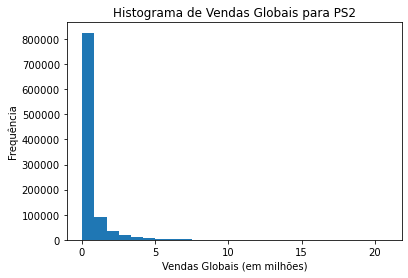

0.025    0.01
0.975    3.53
Name: Global_Sales, dtype: float64

In [ ]:
PS2_sales
# make bootstrap for PS2 on global sales
PS2_sales_bootstrap = PS2_sales['Global_Sales'].sample(n=1000000, replace=True)
PS2_sales_bootstrap
# plot histogram
plt.hist(PS2_sales_bootstrap, bins=25)
plt.xlabel('Vendas Globais (em milhões)')
plt.ylabel('Frequência')
plt.title('Histograma de Vendas Globais para PS2')
plt.show()
# get mean
PS2_sales_bootstrap.mean()
# get confidence interval
PS2_sales_bootstrap.quantile([0.025, 0.975])


In [ ]:
def bootstrap_mean(df: np.array):
    # OS PARÂMETROS INICIAIS PODEM SER ALTERADOS A SEU GOSTO
    # SUA FUNÇÃO DEVE RETORNAR UMA TUPLA COM OS LIMITES DO IC
    # (LI, LS)
    num_repetitions: int = 5000
    means: np.array = np.zeros(num_repetitions)
    for i in np.arange(num_repetitions):
        np.random.seed(i)
        mean: float = np.random.choice(df, size=df.size).mean()
        means[i] = mean
    li: float = np.percentile(means, 2.5)
    ls: float = np.percentile(means, 97.5)
    return (li, ls)

NameError: name 'np' is not defined